In [121]:
import pandas as pd
import numpy as np
import types
import matplotlib.pyplot as plt


In [123]:
%matplotlib inline

## 함수가 아닌 속성을 확인하기 


In [42]:
for i in dir(pd.Series) :
    if not i.startswith("_") :
                   
        if type(pd.Series.__dict__.get(i,None)) ==  types.FunctionType :
            pass
        elif type(pd.core.generic.NDFrame.__dict__.get(i,None)) == types.FunctionType :
            pass
        else :
            print(i)

T
asobject
at
axes
base
blocks
cat
data
dt
dtype
dtypes
empty
factorize
flags
from_array
from_csv
ftype
ftypes
hasnans
iat
iloc
imag
index
is_copy
is_monotonic
is_monotonic_decreasing
is_monotonic_increasing
is_unique
item
itemsize
ix
loc
name
nbytes
ndim
nunique
plot
real
shape
size
str
strides
value_counts
values


## 시리즈를 생성하기 


In [101]:
cool = pd.Series([1,2,3,4,5,6,7,8,9,9])

In [102]:
len(cool)

10

In [103]:
type(cool)

pandas.core.series.Series

## 시리즈 클래스로 인스턴스를 만들었다. 

    실제 값은 보관하는 것을 확인해 본다. 실제 values 속성으로 확인한다. 
    내부적으로 보관하는 값은 numpy.ndarray로 보관한다.
    

In [104]:
cool.values

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 9])

In [105]:
cool.value_counts()

9    2
8    1
7    1
6    1
5    1
4    1
3    1
2    1
1    1
dtype: int64

In [106]:
type(cool.values)

numpy.ndarray

## 시리즈 인스턴스 구성 확인 

    앞에는 index이고 두번째는 실제 값이다.
    
    

In [107]:
cool

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
9    9
dtype: int64

## 시리즈의 인덱스 확인하기 

In [108]:
cool.index

RangeIndex(start=0, stop=10, step=1)

## 인덱스의 인스턴스를 생성하고 기존 인덱스를 대체하기



In [109]:
cool.index = pd.Index(range(1999,2009))

In [111]:
cool

1999    1
2000    2
2001    3
2002    4
2003    5
2004    6
2005    7
2006    8
2007    9
2008    9
dtype: int64

In [112]:
cool.name = "cool"

## 실제 인덱스를 이용한 값 갱신하기


In [113]:
cool[2008]

9

In [114]:
cool[2008] = 10

In [115]:
cool

1999     1
2000     2
2001     3
2002     4
2003     5
2004     6
2005     7
2006     8
2007     9
2008    10
Name: cool, dtype: int64

In [116]:
cool.blocks

{'int64': 1999     1
 2000     2
 2001     3
 2002     4
 2003     5
 2004     6
 2005     7
 2006     8
 2007     9
 2008    10
 Name: cool, dtype: int64}

In [117]:
cool.blocks['int64']

1999     1
2000     2
2001     3
2002     4
2003     5
2004     6
2005     7
2006     8
2007     9
2008    10
Name: cool, dtype: int64

## 슬라이스 처리는 실제 인덱스 정수로 처리

In [21]:
cool[2:3]

2001    3
dtype: int64

## 슬라이스 처리 : 문자로 인덱스가 될 경우는 문자로 인덱스로 처리

    실제 문자로 처리하면 정수와 달리 마지막도 포함해서 처리해준다.
    

In [22]:
cool1 = pd.Series([1,2,3,4],index=['a','b','c','d'])

In [23]:
cool1['a':'c']

a    1
b    2
c    3
dtype: int64

## 시리즈 내의 헤드 부분과 테일 부분을 처리하기

    실제 데이터가 많을 경우 앞 부분과 뒤부분 처리
    

In [19]:
cool.head(3)

1999    1
2000    2
2001    3
dtype: int64

In [20]:
cool.tail(3)

2006     8
2007     9
2008    10
dtype: int64

# 속성을 알아보기


## 전치 

In [45]:
cool.T

1999     1
2000     2
2001     3
2002     4
2003     5
2004     6
2005     7
2006     8
2007     9
2008    10
dtype: int64

## 실제 슬라이스를 처리해도 새로운 시리즈를 만드는 것이 아닌다.

    실제 값은 base에 저장된다. 겉에 인스턴스는 다시 만들어지지만 실제 view만 처리한다.
    

In [52]:
a = cool[:]

In [53]:
a.base

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## 데이터는 메모리 뷰이다.

    실제 원본 데이터를 볼수 있다.
    

In [57]:
isinstance(a.data ,memoryview)

True

In [46]:
cool.data

In [55]:
a.data[0]

1

## 실제 데이터 타입을 확인하기


In [58]:
cool.dtype, cool.dtypes

(dtype('int64'), dtype('int64'))

## 실제 데이터가 어떻게 들어가 있는지를 확인한다.

    data is sparse|dense

In [59]:
cool.ftype, cool.ftypes

('int64:dense', 'int64:dense')

## 차원과 모양  그리고 실제 데이터가 관리되는 플래그 보기 


In [81]:
cool.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [65]:
cool.ndim

1

In [63]:
cool.shape

(10,)

## 실제 들어가 있는 데이터 사이즈 및 크기  확인하기 


In [86]:
cool.nbytes

80

In [61]:
cool.itemsize

8

In [64]:
cool.size

10

In [67]:
cool.strides

(8,)

In [75]:
cool.empty

False

## 실제 내부를  index와 label을 알아보기 


In [88]:
cool

1999     1
2000     2
2001     3
2002     4
2003     5
2004     6
2005     7
2006     8
2007     9
2008    10
dtype: int64

In [77]:
cool.at

In [90]:
cool.at[1999]

1

In [82]:
cool.iat

In [92]:
cool.iat[0]

1

In [83]:
cool.ix

/Users/dahlmoon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [84]:
cool.loc

In [94]:
cool.loc[1999]

1

In [85]:
cool.iloc

In [95]:
cool.iloc[0]

1

## plot  그리기


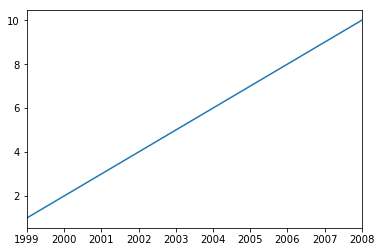

In [124]:
cool.plot()

In [110]:
cool.axes

[RangeIndex(start=1999, stop=2009, step=1)]